In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = (12,6)

In [2]:
flOcean = pd.read_csv('FL_OCEAN_2022.csv')
flOcean.head()

,Time (UTC),Latitude,Longitude,Temperature QC,Temperature,Salinity QC,Salinity,Chlorophyll QC,Chlorophyll,Turbidity QC,...,Oxygen QC,Oxygen,Waves QC,Significant wave height,Wave from direction,Wave period,North surface currents,East surface currents,Unnamed: 19,Unnamed: 20
0,5/17/22 15:30,36.99836,-76.08920,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,234.22,-217.71
1,5/17/22 15:36,36.99836,-76.08920,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,229.55,-186.16
2,5/17/22 15:42,36.99836,-76.08902,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,220.34,-148.13
3,5/17/22 15:48,36.99836,-76.08907,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,215.45,-107.26
4,5/17/22 15:54,36.99833,-76.08920,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,241.88,-25.38


In [3]:
flOcean.drop(list(flOcean.filter(regex = 'QC')), axis = 1, inplace = True)

In [4]:
flOcean.describe()

,Latitude,Longitude,Temperature,Salinity,Chlorophyll,Turbidity,Oxygen,Significant wave height,Wave from direction,Wave period,North surface currents,East surface currents,Unnamed: 19,Unnamed: 20
count,33398.000000,33398.000000,3126.000000,3126.000000,0.0,0.0,0.0,9354.000000,33398.000000,9354.000000,33398.000000,9354.000000,1747.000000,1747.000000
mean,36.998019,-76.088373,22.894878,27.779277,NaN,NaN,NaN,0.574346,1.755734,156.147915,1.755734,7.959971,-20.202284,56.364493
std,0.047379,0.097375,1.569828,1.758980,NaN,NaN,NaN,0.347572,0.429658,111.372439,0.429658,4.136855,250.262544,298.943126
min,28.345460,-76.204190,19.430000,24.830000,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,-657.360000,-629.410000
25%,36.998250,-76.089200,21.570000,26.610000,NaN,NaN,NaN,0.330000,2.000000,63.900000,2.000000,4.140000,-226.860000,-197.825000
50%,36.998260,-76.088970,22.990000,27.300000,NaN,NaN,NaN,0.450000,2.000000,119.900000,2.000000,7.550000,-22.100000,64.580000
75%,36.998320,-76.088970,23.907500,28.530000,NaN,NaN,NaN,0.710000,2.000000,260.700000,2.000000,11.430000,202.110000,314.890000
max,37.277080,-58.294170,26.270000,32.610000,NaN,NaN,NaN,2.100000,2.000000,359.900000,2.000000,17.910000,644.970000,608.600000


TypeError: 'str' object is not callable

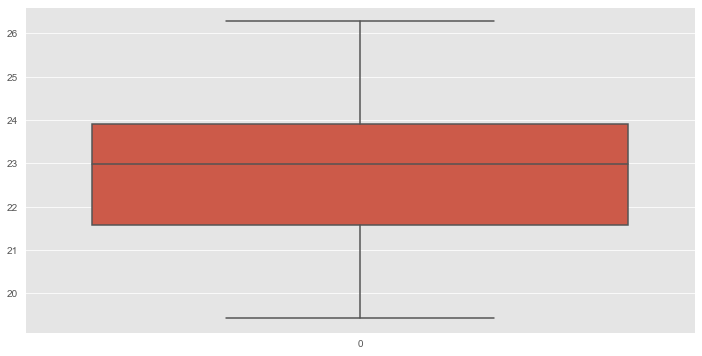

In [47]:
sns.boxplot(data=flOcean['Temperature'])
plt.ylabel('Temp')